# 6. Novelty detection


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.python.keras import Input, Model
from tensorflow.python.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.datasets import mnist, cifar10
from tensorflow.python.keras.utils import to_categorical

# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [0]:
# set random seeds for more reproducible results
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(43)

In [3]:
# load dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
gray = False
if len(x_train.shape)==4 and gray:
    x_train = np.mean(x_train, axis=-1, keepdims=True)
    x_test = np.mean(x_test, axis=-1, keepdims=True)
if len(x_train.shape)==3:
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
train_size = len(y_train)
test_size = len(y_test)
xdim = x_train.shape[1]
ydim = x_train.shape[2]
cdim = x_train.shape[3]
print(x_train.dtype, y_train.dtype)

(50000, 32, 32, 3) (50000, 1)
uint8 uint8


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


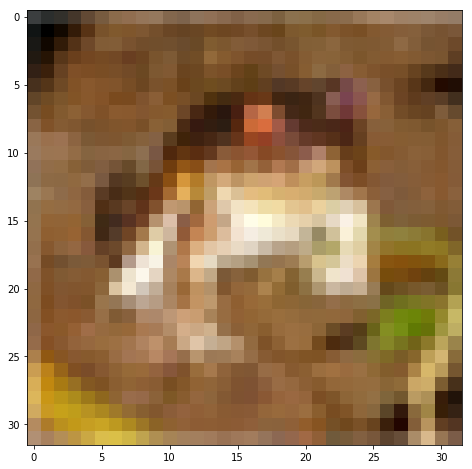

In [4]:
print(x_train[0])
print(y_train[0])
if gray:
    plt.imshow(x_train[0][..., 0], cmap='gray')
else:
    plt.imshow(x_train[0])

In [5]:
print(np.min(x_train), np.max(x_train), np.median(x_train))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

0 255 117.0
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [0]:
x_train = np.asarray([x for x,y in zip(x_train,y_train) if y[0]!=9])
y_train = np.asarray([y for y in y_train if y[0]!=9])

In [7]:
print(np.unique(y_train, return_counts=True))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [0]:
n_classes = len(np.unique(y_train))
x_train, y_train = shuffle(x_train, y_train, random_state=44)
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train, n_classes)

In [0]:
def get_model(bn):
    inputs = Input(shape=(xdim, ydim, cdim))
    f = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
    if bn:
        f = BatchNormalization()(f)
    f = Conv2D(filters=32, kernel_size=3, activation='relu')(f)
    if bn:
        f = BatchNormalization()(f)
    f = MaxPooling2D()(f)
    f = Dropout(0.25)(f)
    f = Conv2D(filters=64, kernel_size=3, activation='relu')(f)
    if bn:
        f = BatchNormalization()(f)
    f = Conv2D(filters=64, kernel_size=3, activation='relu')(f)
    if bn:
        f = BatchNormalization()(f)
    f = MaxPooling2D()(f)
    f = Dropout(0.25)(f)
    f = Flatten()(f)
    f = Dense(512, activation='relu')(f)
    f = Dropout(0.5)(f)
    f = Dense(n_classes, name='logits')(f)
    outputs = Activation('softmax')(f)
    return Model(inputs=inputs, outputs=outputs)

In [10]:
model = get_model(bn=False)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 36000 samples, validate on 9000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
36000/36000 [==============================] - 9s 257us/sample - loss: 2.1203 - acc: 0.1695 - val_loss: 2.0128 - val_acc: 0.2416
Epoch 2/100
36000/36000 [==============================] - 8s 221us/sample - loss: 1.9550 - acc: 0.2521 - val_loss: 1.8819 - val_acc: 0.3020
Epoch 3/100
36000/36000 [==============================] - 8s 223us/sample - loss: 1.8658 - acc: 0.2981 - val_loss: 1.7738 - val_acc: 0.3479
Epoch 4/100
36000/36000 [==============================] - 8s 222us/sample - loss: 1.7656 - acc: 0.3404 - val_loss: 1.7081 - val_acc: 0.3731
Epoch 5/100
36000/36000 [==============================] - 8s 223us/sample - loss: 1.6852 - acc: 0.3728 - val_loss: 1.5756 - val_acc: 0.4190
Epoch 6/100

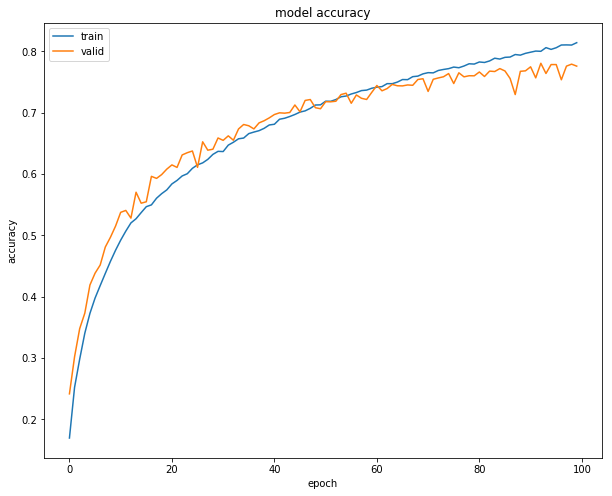

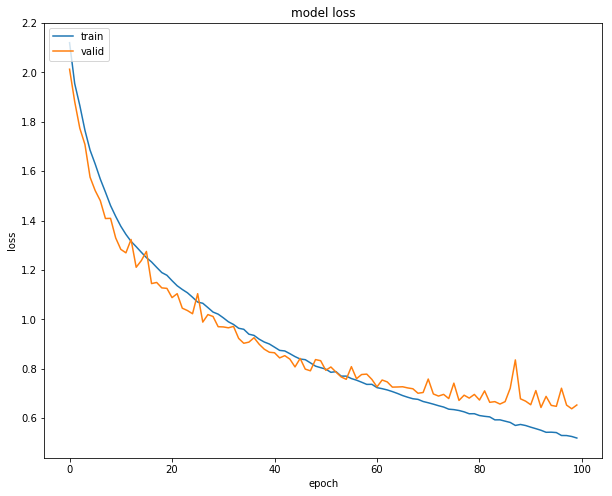

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
get_logits = Model(inputs=model.input, outputs=model.get_layer('logits').output)

(array([0.01268476, 0.04518947, 0.08165816, 0.10464929, 0.09909971,
        0.0911717 , 0.09989254, 0.05470302, 0.04915347, 0.03963987,
        0.03171192, 0.02774791, 0.01585595, 0.01109918, 0.00951357,
        0.00951357, 0.0007928 , 0.00396399, 0.00317119, 0.00158559]),
 array([ 1.9137549,  3.1751108,  4.4364667,  5.6978226,  6.9591784,
         8.220534 ,  9.481891 , 10.743246 , 12.004602 , 13.265958 ,
        14.527314 , 15.78867  , 17.050026 , 18.311382 , 19.572737 ,
        20.834093 , 22.09545  , 23.356806 , 24.61816  , 25.879517 ,
        27.140873 ], dtype=float32),
 <a list of 20 Patch objects>)

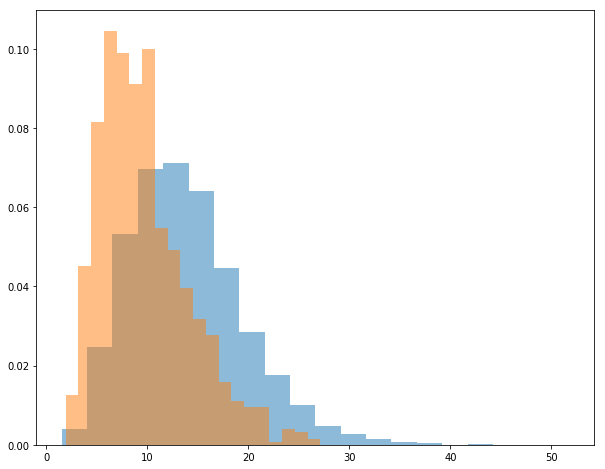

In [45]:
logits = get_logits.predict(x_test)
max_logits = np.max(logits, axis=-1)-np.min(logits, axis=-1)
logit_normal = [p for p,y in zip(max_logits, y_test) if y<9]
logit_novel = [p for p,y in zip(max_logits, y_test) if y==9]
plt.hist(logit_normal, 20, density=True, alpha=0.5, label='normal')
plt.hist(logit_novel, 20, density=True, alpha=0.5, label='novel')